LAB 2 13.10.2025 Marek M. Patryk S.

In [61]:
import time

def p2_dominuje_p1(p2, p1, kierunki):
    """
    Sprawdza, czy punkt p2 dominuje punkt p1, biorąc pod uwagę kierunki optymalizacji.
    Dominacja zachodzi, gdy p2 jest lepszy lub równy we wszystkich kryteriach
    i ściśle lepszy w co najmniej jednym.

    Argumenty:
        p2, p1 : list/tuple liczb
            Porównywane punkty.
        kierunki : list/tuple liczb (1 lub -1)
            1 = minimalizacja, -1 = maksymalizacja.
    
    Zwraca:
        (bool, int): para (czy_dominuje, liczba_porównań_współrzędnych)
    """
    # Przeskalowanie punktów tak, aby wszystkie kryteria traktować jako minimalizację
    p1_scaled = [x1 * k for x1, k in zip(p1, kierunki)]
    p2_scaled = [x2 * k for x2, k in zip(p2, kierunki)]

    liczba_porownan_wsp = 0
    jest_lepszy_lub_rowny = True
    jest_scisle_lepszy = False

    # Jedno przejście przez współrzędne – zliczamy porównania
    for x1, x2 in zip(p1_scaled, p2_scaled):
        liczba_porownan_wsp += 1  # porównania
        if x2 > x1:  # gorszy w którejś współrzędnej => nie dominuje
            jest_lepszy_lub_rowny = False
            break
        if x2 < x1:
            jest_scisle_lepszy = True

    return jest_lepszy_lub_rowny and jest_scisle_lepszy, liczba_porownan_wsp


def znajdz_front_pareto(X, kierunki):
    """
    Znajduje zbiór punktów niezdominowanych (front Pareto) z uwzględnieniem
    kierunków optymalizacji i zlicza osobno:
        - liczbę porównań punktów,
        - liczbę porównań współrzędnych,
        - całkowity czas obliczeń.

    Argumenty:
        X (list of list/tuple): Lista punktów wejściowych.
        kierunki (list/tuple): Lista z wartościami 1 (minimalizacja) lub -1 (maksymalizacja)
                               dla każdego kryterium.

    Zwraca:
        tuple:
            - lista P punktów niezdominowanych,
            - liczba_porownan_punktow,
            - liczba_porownan_wspolrzednych,
            - czas_obliczen (sekundy)
    """
    start_time = time.perf_counter()

    liczba_porownan_punktow = 0
    liczba_porownan_wspolrzednych = 0
    P = []

    for p1 in X:
        jest_zdominowany = False
        for p2 in X:
            if p1 is p2:
                continue

            liczba_porownan_punktow += 1
            dominuje, porownania_wsp = p2_dominuje_p1(p2, p1, kierunki)
            liczba_porownan_wspolrzednych += porownania_wsp

            if dominuje:
                jest_zdominowany = True
                break

        if not jest_zdominowany:
            P.append(p1)

    P_unikalne = list(dict.fromkeys(map(tuple, P)))
    czas_obliczen = time.perf_counter() - start_time

    return P_unikalne, liczba_porownan_punktow, liczba_porownan_wspolrzednych, czas_obliczen


In [62]:

# Zbiór punktów wejściowych
punkty_X = [
    (5,5), (3,6), (4,4), (5,3), (3,3),
    (1,8), (3,4), (4,5), (3,10), (6,6), (4, 1), (3, 5)
]
kierunki = [1, 1] # 1 - minimalizacja, -1 maksymalizacja
# Wywołanie algorytmu i rozpakowanie wyników
front_pareto, liczba_porownan_punktow, liczba_porownan_wspolrzednych, czas_obliczen = znajdz_front_pareto(punkty_X, kierunki)

# Wydrukowanie wyników
print("Zbiór punktów wejściowych X:")
print(punkty_X)
print("\n------------------------------------\n")
print("Znaleziony zbiór punktów niezdominowanych P(X):")
print(front_pareto)
print(f"\nCałkowita liczba wykonanych porównań punktów: {liczba_porownan_punktow}")
print(f"\nCałkowita liczba wykonanych porównań współrzędnych: {liczba_porownan_wspolrzednych}")
print(f"Czas obliczeń: {czas_obliczen:.6f} s")

Zbiór punktów wejściowych X:
[(5, 5), (3, 6), (4, 4), (5, 3), (3, 3), (1, 8), (3, 4), (4, 5), (3, 10), (6, 6), (4, 1), (3, 5)]

------------------------------------

Znaleziony zbiór punktów niezdominowanych P(X):
[(3, 3), (1, 8), (4, 1)]

Całkowita liczba wykonanych porównań punktów: 63

Całkowita liczba wykonanych porównań współrzędnych: 93
Czas obliczeń: 0.000076 s


Z filtrem 

In [63]:
import time

def p2_dominuje_p1(p2, p1, kierunki):
    """
    Sprawdza, czy punkt p2 dominuje punkt p1, biorąc pod uwagę kierunki optymalizacji.
    Dominacja zachodzi, gdy p2 jest lepszy lub równy we wszystkich kryteriach
    i ściśle lepszy w co najmniej jednym.

    Argumenty:
        p2, p1 : list/tuple liczb
            Porównywane punkty.
        kierunki : list/tuple liczb (1 lub -1)
            1 = minimalizacja, -1 = maksymalizacja.
    
    Zwraca:
        (bool, int): para (czy_dominuje, liczba_porównań_współrzędnych)
    """
    # Przeskalowanie punktów tak, aby wszystkie kryteria traktować jako minimalizację
    p1_scaled = [x1 * k for x1, k in zip(p1, kierunki)]
    p2_scaled = [x2 * k for x2, k in zip(p2, kierunki)]

    liczba_porownan_wsp = 0
    jest_lepszy_lub_rowny = True
    jest_scisle_lepszy = False

    # Jedno przejście przez współrzędne – zliczamy porównania
    for x1, x2 in zip(p1_scaled, p2_scaled):
        liczba_porownan_wsp += 1  # porównania
        if x2 > x1:  # gorszy w którejś współrzędnej => nie dominuje
            jest_lepszy_lub_rowny = False
            break
        if x2 < x1:
            jest_scisle_lepszy = True

    return jest_lepszy_lub_rowny and jest_scisle_lepszy, liczba_porownan_wsp


def znajdz_front_z_filtracja(X, kierunki):
    """
    Znajduje front Pareto z agresywną filtracją, zliczając:
      - liczbę porównań punktów,
      - liczbę porównań współrzędnych,
      - całkowity czas działania.

    Argumenty:
        X (list of list/tuple): Lista punktów wejściowych.
        kierunki (list/tuple): Lista z wartościami 1 (minimalizacja) lub -1 (maksymalizacja)
                               dla każdego kryterium.

    Zwraca:
        tuple:
            - lista P punktów niezdominowanych,
            - liczba_porownan_punktow,
            - liczba_porownan_wspolrzednych,
            - czas_obliczen (sekundy)
    """
    start_time = time.perf_counter()

    liczba_porownan_punktow = 0
    liczba_porownan_wspolrzednych = 0
    P = []  # Zbiór punktów niezdominowanych
    X_do_przegladu = list(X)  # Kopia zbioru do modyfikacji

    while X_do_przegladu:
        kandydat = X_do_przegladu[0]

        # --- Szukaj lepszego kandydata ---
        for inny_punkt in X_do_przegladu[1:]:
            liczba_porownan_punktow += 1
            dominuje, por_wsp = p2_dominuje_p1(inny_punkt, kandydat, kierunki)
            liczba_porownan_wspolrzednych += por_wsp

            if dominuje:
                kandydat = inny_punkt

        P.append(kandydat)

        # --- Filtracja zdominowanych punktów ---
        liczba_porownan_punktow += len(X_do_przegladu)
        nowa_lista = []
        for p in X_do_przegladu:
            if p == kandydat:
                continue
            dominuje, por_wsp = p2_dominuje_p1(kandydat, p, kierunki)
            liczba_porownan_wspolrzednych += por_wsp
            if not dominuje:
                nowa_lista.append(p)
        X_do_przegladu = nowa_lista

    czas_obliczen = time.perf_counter() - start_time
    return P, liczba_porownan_punktow, liczba_porownan_wspolrzednych, czas_obliczen


In [64]:
# Zbiór punktów wejściowych
punkty_X = [
    (5,5), (3,6), (4,4), (5,3), (3,3),
    (1,8), (3,4), (4,5), (3,10), (6,6), (4, 1), (3, 5)
]
kierunki = [1, 1] # 1 - minimalizacja, -1 maksymalizacja
# Wywołanie algorytmu i rozpakowanie wyników
front_pareto, liczba_porownan_punktow, liczba_porownan_wspolrzednych, czas_obliczen = znajdz_front_z_filtracja(punkty_X, kierunki)

# Wydrukowanie wyników
print("Zbiór punktów wejściowych X:")
print(punkty_X)
print("\n------------------------------------\n")
print("Znaleziony zbiór punktów niezdominowanych P(X):")
print(front_pareto)
print(f"\nCałkowita liczba wykonanych porównań punktów: {liczba_porownan_punktow}")
print(f"\nCałkowita liczba wykonanych porównań współrzędnych: {liczba_porownan_wspolrzednych}")
print(f"Czas obliczeń: {czas_obliczen:.6f} s")

Zbiór punktów wejściowych X:
[(5, 5), (3, 6), (4, 4), (5, 3), (3, 3), (1, 8), (3, 4), (4, 5), (3, 10), (6, 6), (4, 1), (3, 5)]

------------------------------------

Znaleziony zbiór punktów niezdominowanych P(X):
[(3, 3), (1, 8), (4, 1)]

Całkowita liczba wykonanych porównań punktów: 27

Całkowita liczba wykonanych porównań współrzędnych: 42
Czas obliczeń: 0.000040 s


In [65]:
import math
import time

def p2_dominuje_p1(p2, p1, kierunki):
    """
    Sprawdza, czy punkt p2 dominuje punkt p1, biorąc pod uwagę kierunki optymalizacji.
    Dominacja zachodzi, gdy p2 jest lepszy lub równy we wszystkich kryteriach
    i ściśle lepszy w co najmniej jednym.

    Argumenty:
        p2, p1 : list/tuple liczb
            Porównywane punkty.
        kierunki : list/tuple liczb (1 lub -1)
            1 = minimalizacja, -1 = maksymalizacja.
    
    Zwraca:
        (bool, int): para (czy_dominuje, liczba_porównań_współrzędnych)
    """
    # Przeskalowanie punktów tak, aby wszystkie kryteria traktować jako minimalizację
    p1_scaled = [x1 * k for x1, k in zip(p1, kierunki)]
    p2_scaled = [x2 * k for x2, k in zip(p2, kierunki)]

    liczba_porownan_wsp = 0
    jest_lepszy_lub_rowny = True
    jest_scisle_lepszy = False

    # Jedno przejście przez współrzędne – zliczamy porównania
    for x1, x2 in zip(p1_scaled, p2_scaled):
        liczba_porownan_wsp += 1  # porównania
        if x2 > x1:  # gorszy w którejś współrzędnej => nie dominuje
            jest_lepszy_lub_rowny = False
            break
        if x2 < x1:
            jest_scisle_lepszy = True

    return jest_lepszy_lub_rowny and jest_scisle_lepszy, liczba_porownan_wsp

def odleglosc_kwadrat(p1, p2):
    """Oblicza kwadrat odległości euklidesowej między dwoma punktami."""
    return sum((c1 - c2) ** 2 for c1, c2 in zip(p1, p2))


def algorytm_punkt_idealny(X, kierunki):
    """
    Algorytm znajdowania frontu Pareto oparty o punkt idealny,
    zliczający porównania punktów, współrzędnych oraz czas wykonania.

    Argumenty:
        X (list of list/tuple): Lista punktów wejściowych.
        kierunki (list/tuple): 1 = minimalizacja, -1 = maksymalizacja.

    Zwraca:
        tuple:
            - lista P punktów niezdominowanych,
            - liczba_porownan_punktow,
            - liczba_porownan_wspolrzednych,
            - czas_obliczen (sekundy)
    """
    if not X:
        return [], 0, 0, 0.0

    start_time = time.perf_counter()

    liczba_porownan_punktow = 0
    liczba_porownan_wspolrzednych = 0
    P = []

    # --- Krok 2–3: Znajdź punkt idealny ---
    X_scaled = [[x * k for x, k in zip(p, kierunki)] for p in X]
    liczba_wymiarow = len(X[0])
    punkt_idealny = tuple(
    min(p[i] for p in X) if kierunki[i] == 1 else max(p[i] for p in X)
    for i in range(len(X[0]))
)

    # --- Krok 4–6: Oblicz odległości do punktu idealnego i posortuj ---
    odleglosci_posortowane = sorted(
        [(odleglosc_kwadrat(punkt_idealny, p_scaled), p_original)
         for p_scaled, p_original in zip(X_scaled, X)]
    )

    # --- Krok 7–9: Filtracja zdominowanych punktów ---
    X_do_przegladu = list(X)

    for dist, punkt_sprawdzany in odleglosci_posortowane:
        # Jeśli punkt został już usunięty, pomiń go
        if punkt_sprawdzany not in X_do_przegladu:
            continue

        # Punkt nie jest zdominowany — trafia na front Pareto
        P.append(punkt_sprawdzany)

        # Sprawdzenie i usuwanie punktów zdominowanych przez ten punkt
        liczba_porownan_punktow += len(X_do_przegladu)

        nowa_lista = []
        for p in X_do_przegladu:
            if p == punkt_sprawdzany:
                continue
            dominuje, por_wsp = p2_dominuje_p1(punkt_sprawdzany, p, kierunki)
            liczba_porownan_wspolrzednych += por_wsp
            if not dominuje:
                nowa_lista.append(p)
        X_do_przegladu = nowa_lista

    czas_obliczen = time.perf_counter() - start_time
    return P, liczba_porownan_punktow, liczba_porownan_wspolrzednych, czas_obliczen



In [66]:
# Zbiór punktów wejściowych
punkty_X = [
    (5,5), (3,6), (4,4), (5,3), (3,3),
    (1,8), (3,4), (4,5), (3,10), (6,6), (4, 1), (3, 5)
]
kierunki = [1, 1] # 1 - minimalizacja, -1 maksymalizacja
# Wywołanie algorytmu i rozpakowanie wyników
front_pareto, liczba_porownan_punktow, liczba_porownan_wspolrzednych, czas_obliczen = algorytm_punkt_idealny(punkty_X, kierunki)

# Wydrukowanie wyników
print("Zbiór punktów wejściowych X:")
print(punkty_X)
print("\n------------------------------------\n")
print("Znaleziony zbiór punktów niezdominowanych P(X):")
print(front_pareto)
print(f"\nCałkowita liczba wykonanych porównań punktów: {liczba_porownan_punktow}")
print(f"\nCałkowita liczba wykonanych porównań współrzędnych: {liczba_porownan_wspolrzednych}")
print(f"Czas obliczeń: {czas_obliczen:.6f} s")

Zbiór punktów wejściowych X:
[(5, 5), (3, 6), (4, 4), (5, 3), (3, 3), (1, 8), (3, 4), (4, 5), (3, 10), (6, 6), (4, 1), (3, 5)]

------------------------------------

Znaleziony zbiór punktów niezdominowanych P(X):
[(3, 3), (4, 1), (1, 8)]

Całkowita liczba wykonanych porównań punktów: 15

Całkowita liczba wykonanych porównań współrzędnych: 22
Czas obliczeń: 0.000093 s


Eksperymenty obliczeniowe część 2


ŚREDNIE PARAMETRY METOD:

        rozklad      n   k         metoda       czas  liczba porównań punktów  \
0   jednostajny    100   2      filtracja   0.000277                   262.46   
1   jednostajny    100   2      klasyczna   0.001530                  1458.64   
2   jednostajny    100   2  punkt_idealny   0.000336                   129.66   
3   jednostajny    100   3      filtracja   0.000712                   605.80   
4   jednostajny    100   3      klasyczna   0.003412                  2960.56   
..          ...    ...  ..            ...        ...                      ...   
85     poissona  10000   5      klasyczna   1.348176               1107697.50   
86     poissona  10000   5  punkt_idealny   0.057709                 11316.30   
87     poissona  10000  10      filtracja   1.719774               1059434.35   
88     poissona  10000  10      klasyczna  29.032461              18063360.40   
89     poissona  10000  10  punkt_idealny   0.820931                431887.45   



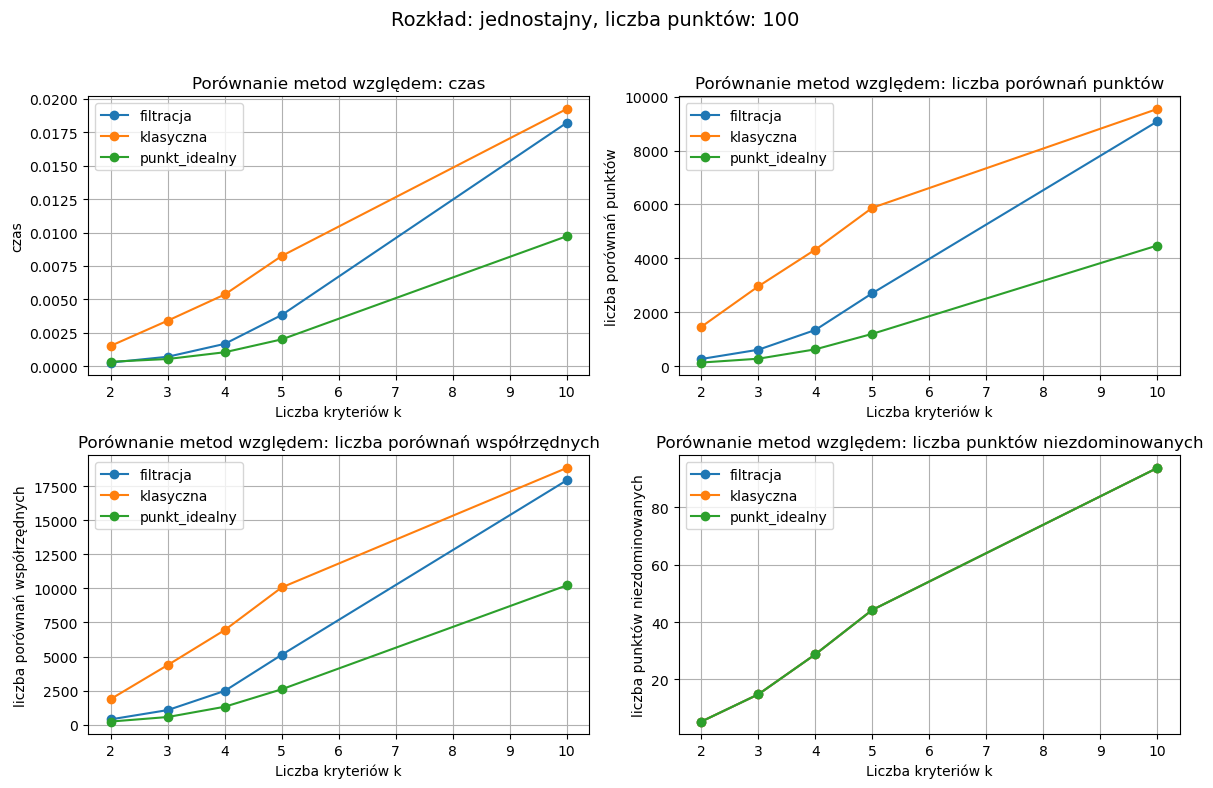

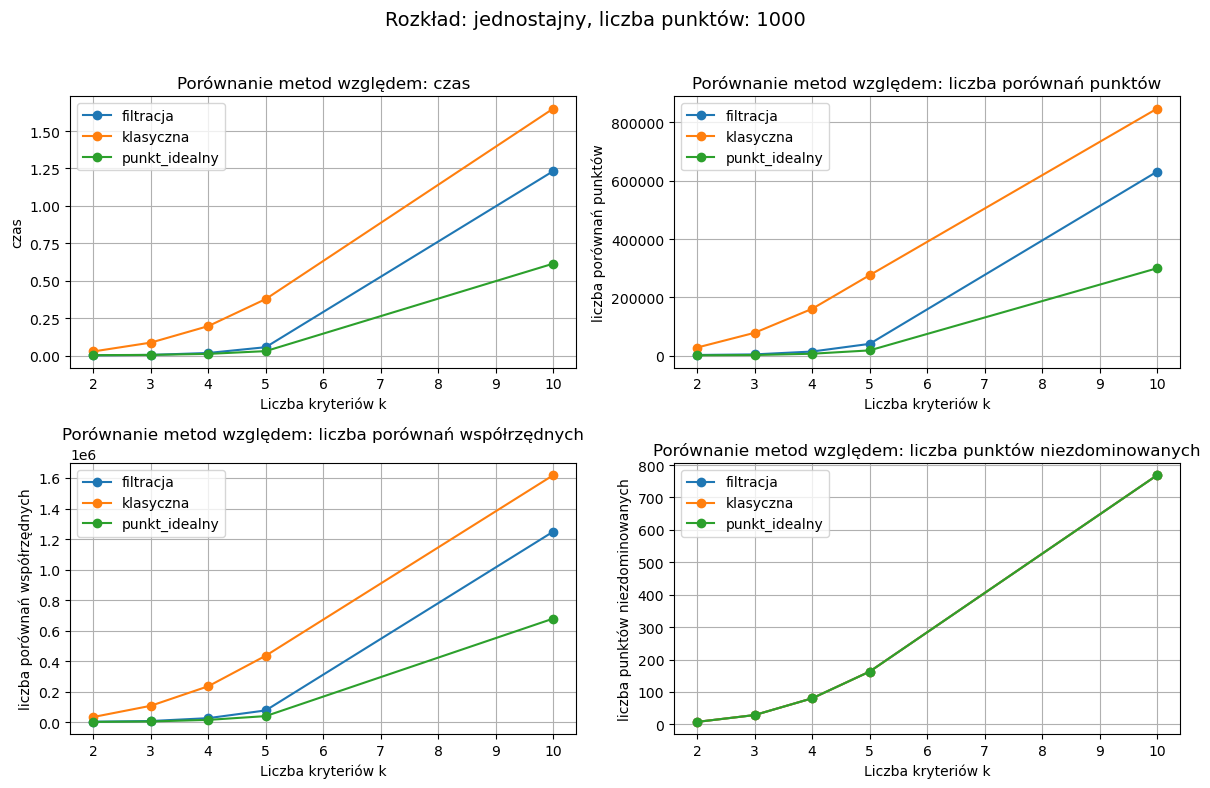

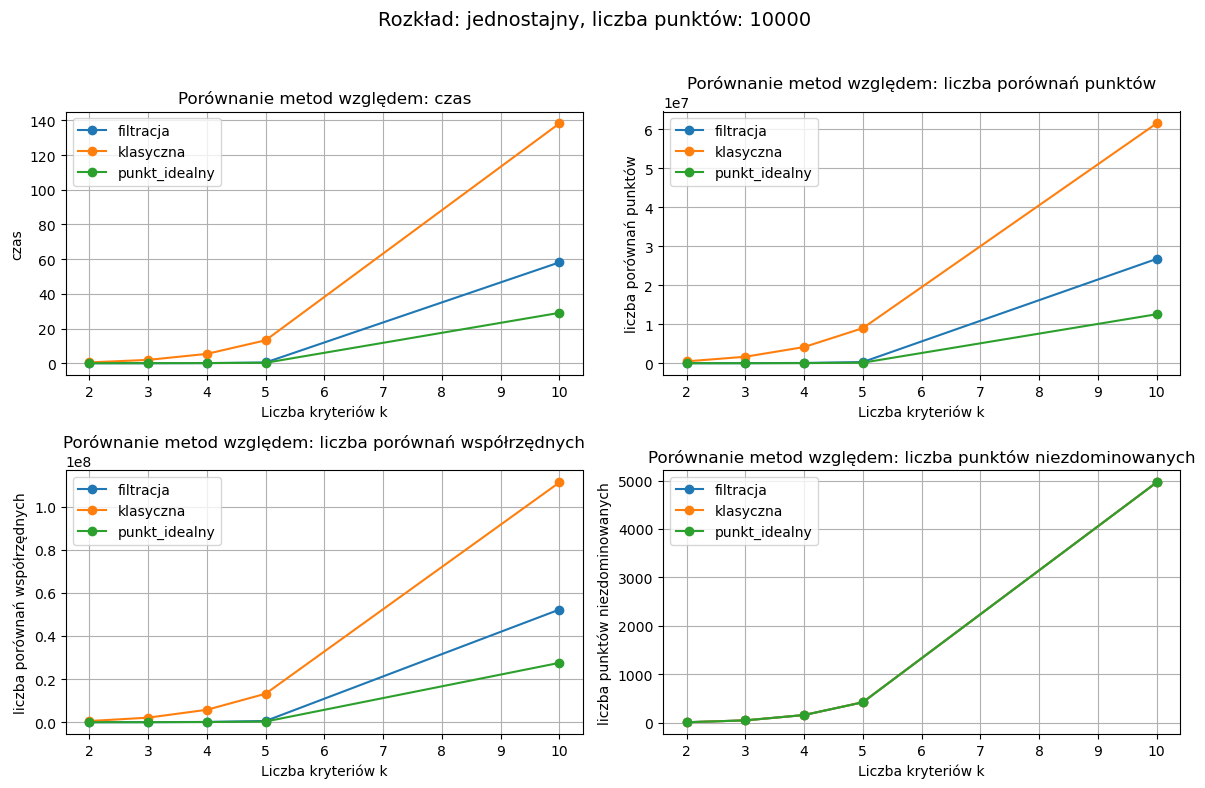

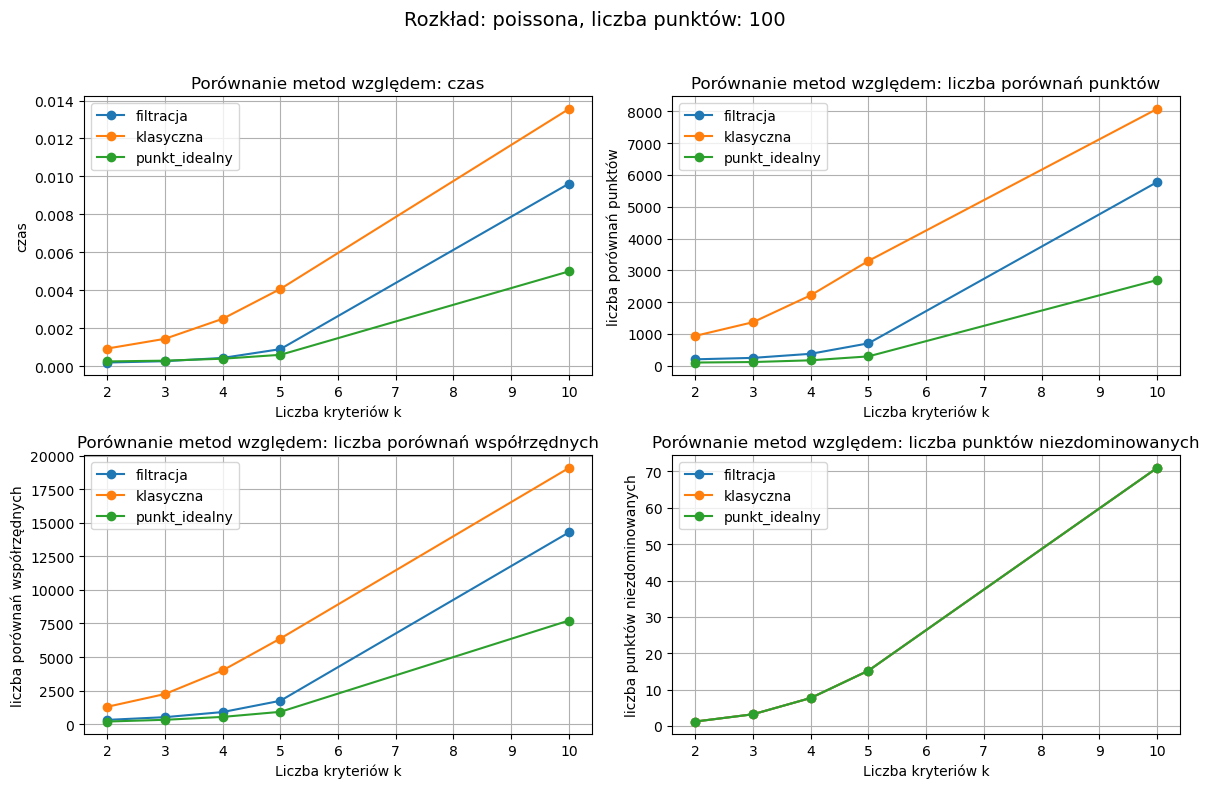

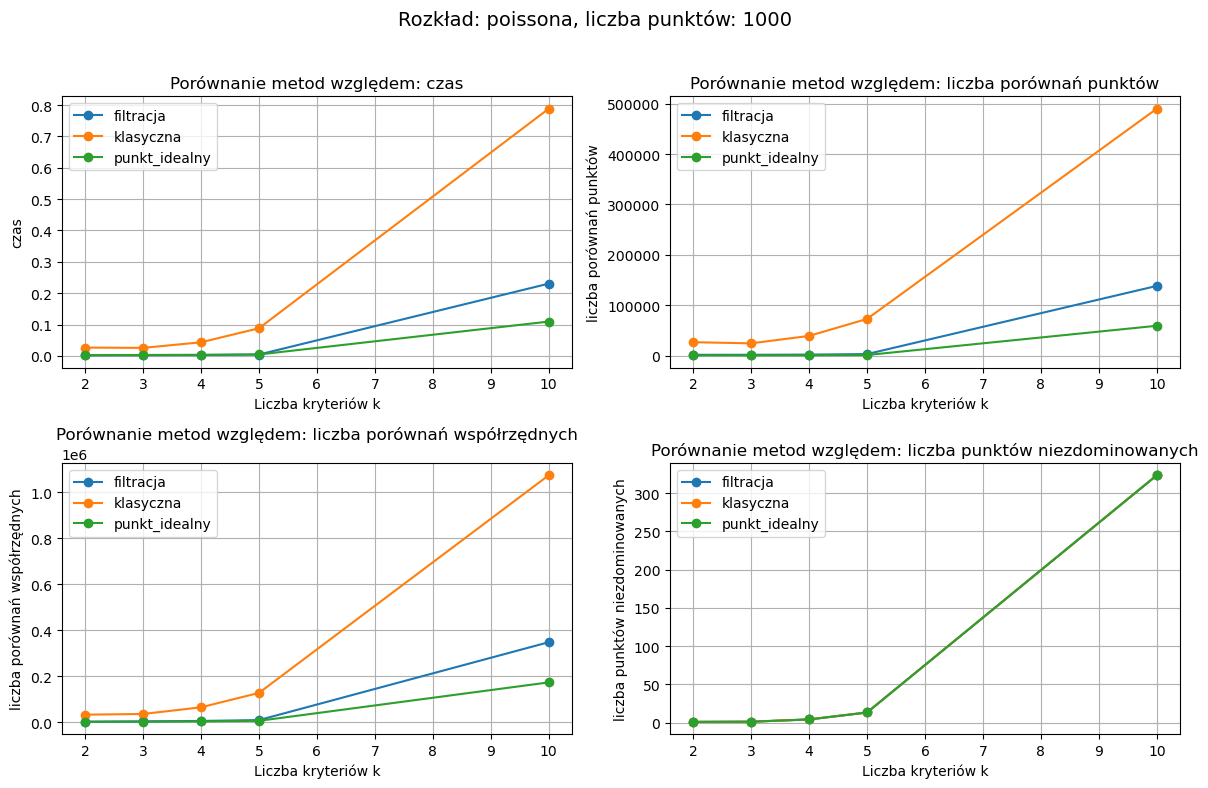

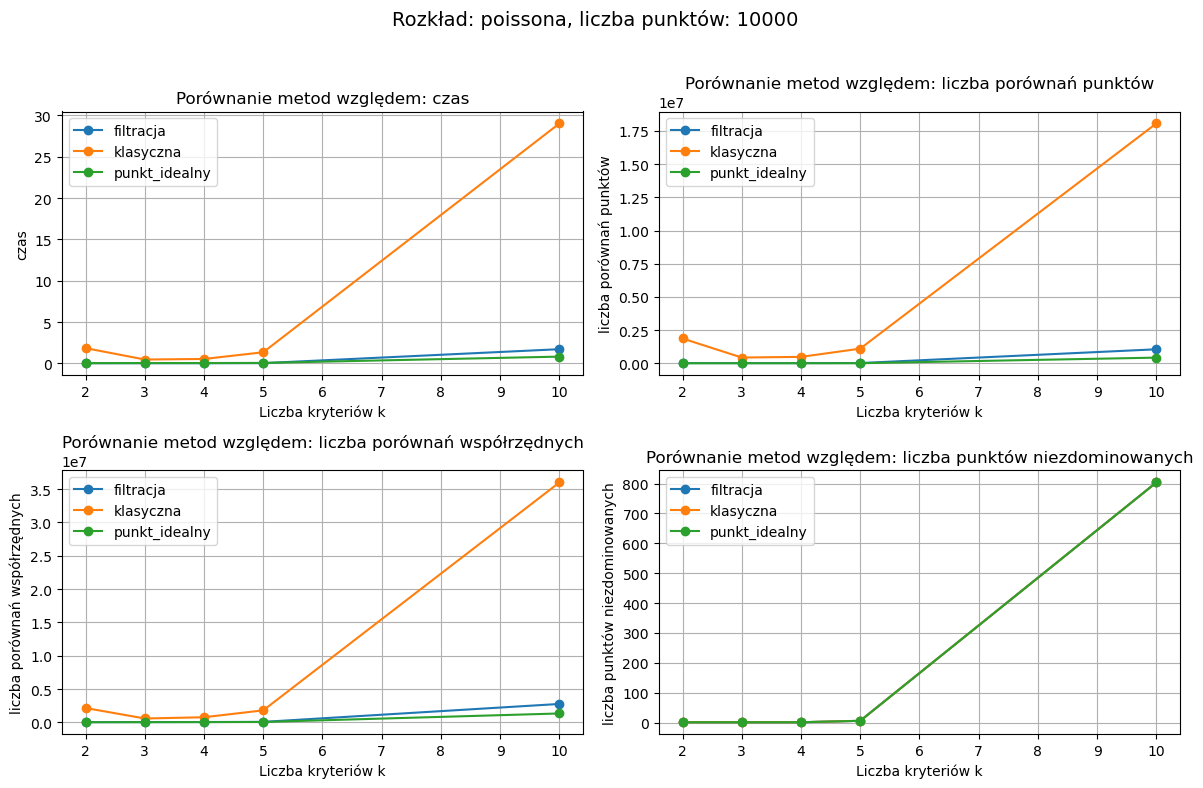


Wyniki zapisane do pliku wyniki_porownanie_metod.csv


In [67]:
import numpy as np
import pandas as pd
import time
import random
import matplotlib.pyplot as plt
def testuj_metody(kryteria_list=[2,3,4,5,10],
                  liczebnosci=[100, 1000, 10000],
                  K1=50, K2=25, K3=20,
                  rozklady=["jednostajny", "poissona"]):

    wyniki = []
    kierunki = [1] * max(kryteria_list)  # minimalizacja wszystkich kryteriów

    for rozklad in rozklady:
        for k in kryteria_list:
            for n in liczebnosci:
                # Dobierz liczbę prób zgodnie z K1, K2, K3
                if n == 100:
                    K = K1
                elif n == 1000:
                    K = K2
                else:
                    K = K3

                for i in range(K):
                    # --- Generowanie danych ---
                    if rozklad == "jednostajny":
                        X = np.random.uniform(0, 2, size=(n, k))
                    elif rozklad == "normalny":
                        X = np.random.normal(1, 1, size=(n, k))
                    elif rozklad == "eksponencjalny":
                        X = np.random.exponential(1, size=(n, k))
                    elif rozklad == "poissona":
                        X = np.random.poisson(2, size=(n, k))
                    else:
                        raise ValueError("Nieznany rozkład")

                    X_list = X.tolist()

                    # --- Metoda 1: klasyczna ---
                    P1, pkt1, wsp1, t1 = znajdz_front_pareto(X_list, kierunki[:k])

                    # --- Metoda 2: z filtracją ---
                    P2, pkt2, wsp2, t2 = znajdz_front_z_filtracja(X_list, kierunki[:k])

                    # --- Metoda 3: punkt idealny ---
                    P3, pkt3, wsp3, t3 = algorytm_punkt_idealny(X_list, kierunki[:k])

                    wyniki.append({
                        "rozklad": rozklad,
                        "n": n,
                        "k": k,
                        "metoda": "klasyczna",
                        "czas": t1,
                        "liczba porównań punktów": pkt1,
                        "liczba porównań współrzędnych": wsp1,
                        "liczba punktów niezdominowanych": len(P1)
                    })
                    wyniki.append({
                        "rozklad": rozklad,
                        "n": n,
                        "k": k,
                        "metoda": "filtracja",
                        "czas": t2,
                        "liczba porównań punktów": pkt2,
                        "liczba porównań współrzędnych": wsp2,
                        "liczba punktów niezdominowanych": len(P2)
                    })
                    wyniki.append({
                        "rozklad": rozklad,
                        "n": n,
                        "k": k,
                        "metoda": "punkt_idealny",
                        "czas": t3,
                        "liczba porównań punktów": pkt3,
                        "liczba porównań współrzędnych": wsp3,
                        "liczba punktów niezdominowanych": len(P3)
                    })

    df = pd.DataFrame(wyniki)
    return df


# FUNKCJA DO ANALIZY WYNIKÓW
def podsumuj_i_wizualizuj(df):
    # --- Agregacja wyników ---
    summary = df.groupby(["rozklad", "n", "k", "metoda"]).agg({
        "czas": "mean",
        "liczba porównań punktów": "mean",
        "liczba porównań współrzędnych": "mean",
        "liczba punktów niezdominowanych": "mean"
    }).reset_index()

    print("\nŚREDNIE PARAMETRY METOD:\n")
    print(summary)

    # --- Wizualizacje ---
    parametry = ["czas", "liczba porównań punktów", "liczba porównań współrzędnych", "liczba punktów niezdominowanych"]
    for rozklad in summary["rozklad"].unique():
        for n in summary["n"].unique():
            df_sub = summary[(summary["rozklad"] == rozklad) & (summary["n"] == n)]

            fig, axs = plt.subplots(2, 2, figsize=(12, 8))
            fig.suptitle(f"Rozkład: {rozklad}, liczba punktów: {n}", fontsize=14)

            for ax, parametr in zip(axs.flat, parametry):
                for metoda in df_sub["metoda"].unique():
                    dane = df_sub[df_sub["metoda"] == metoda]
                    ax.plot(dane["k"], dane[parametr], marker='o', label=metoda)
                ax.set_title(f"Porównanie metod względem: {parametr}")
                ax.set_xlabel("Liczba kryteriów k")
                ax.set_ylabel(parametr)
                ax.grid(True)
                ax.legend()

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.show()

    return summary


# URUCHOMIENIE TESTU
if __name__ == "__main__":
    df = testuj_metody(
        kryteria_list=[2, 3, 4, 5, 10],
        liczebnosci=[100, 1000, 10000],  #10000 trwa długo
        rozklady=["jednostajny", "poissona"]
    )

    summary = podsumuj_i_wizualizuj(df)
    df.to_csv("wyniki_porownanie_metod.csv", index=False)
    print("\nWyniki zapisane do pliku wyniki_porownanie_metod.csv")

Eksperymenty obliczeniowe część 3

In [68]:
import numpy as np
import itertools
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def analiza_A(k0=6, n_points=100, n_sets=50, funkcja=1):
    results = []
    kierunki = [1] * k0  # wszystkie kryteria minimalizowane
    for _ in range(n_sets):
        X = np.random.rand(n_points, k0)
        for k in range(2, k0+1):
            ratios = []
            for subset in itertools.combinations(range(k0), k):
                X_sub = X[:, subset]
                if funkcja == 1:
                    pareto, _, _, _ = znajdz_front_pareto(X_sub.tolist(), kierunki)
                elif funkcja == 2:
                    pareto, _, _, _ = znajdz_front_z_filtracja(X_sub.tolist(), kierunki)
                else:
                    pareto, _, _, _ = algorytm_punkt_idealny(X_sub.tolist(), kierunki)
                ratios.append(len(pareto) / len(X))
            results.append((k, np.mean(ratios)))
    dfA = pd.DataFrame(results, columns=["k", "ratio"])
    modelA = LinearRegression().fit(dfA[["k"]], dfA["ratio"])
    print("Część A: y = {:.4f} * k + {:.4f}".format(modelA.coef_[0], modelA.intercept_))
    
    plt.scatter(dfA["k"], dfA["ratio"], alpha=0.6)
    plt.plot(sorted(dfA["k"].unique()), modelA.predict(np.array(sorted(dfA["k"].unique())).reshape(-1,1)), 'r--')
    plt.xlabel("Liczba kryteriów k")
    plt.ylabel("Średni iloraz pkt. ND i liczności zbioru X")
    plt.title("Część A: Zależność ilorazu liczby punktów niezdominowanych i liczności zbioru X od liczby kryteriów")
    plt.legend(['Średnie wartości ilorazu', 'Regresja liniowa'])
    plt.grid()
    plt.show()
    return dfA


def analiza_B(k0=7, n_points=100, n_sets=50, funkcja=1):
    wyniki = []
    kierunki = [1] * k0  # wszystkie kryteria minimalizowane
    
    for _ in range(n_sets):
        X = np.random.rand(n_points, k0)
        if funkcja == 1:
            P_k0, _, _, _ = znajdz_front_pareto(X.tolist(), kierunki)
        elif funkcja == 2:
            P_k0, _, _, _ = znajdz_front_z_filtracja(X.tolist(), kierunki)
        else:
            P_k0, _, _, _ = algorytm_punkt_idealny(X.tolist(), kierunki)
        N_k0 = len(P_k0)

        for k in range(2, k0):
            ratios = []
            for subset in itertools.combinations(range(k0), k):
                X_sub = X[:, subset]
                if funkcja == 1:
                    P_k, _, _, _ = znajdz_front_pareto(X_sub.tolist(), kierunki)
                elif funkcja == 2:
                    P_k, _, _, _ = znajdz_front_z_filtracja(X_sub.tolist(), kierunki)
                else:
                    P_k, _, _, _ = algorytm_punkt_idealny(X_sub.tolist(), kierunki)
                ratios.append(len(P_k) / N_k0)
            wyniki.append((k0 - k, np.mean(ratios)))

    dfB = pd.DataFrame(wyniki, columns=["delta_k", "ratio"])
    modelB = LinearRegression().fit(dfB[["delta_k"]], dfB["ratio"])

    print("Część B – regresja liniowa:")
    print(f"y = {modelB.coef_[0]:.4f} * (k0 - k) + {modelB.intercept_:.4f}")

    plt.scatter(dfB["delta_k"], dfB["ratio"], alpha=0.6)
    plt.plot(sorted(dfB["delta_k"].unique()),
             modelB.predict(np.array(sorted(dfB["delta_k"].unique())).reshape(-1, 1)), 'r--')
    plt.xlabel("Różnica (k0 - k)")
    plt.ylabel("Iloraz ND(k)/ND(k0)")
    plt.title("Część B: zależność ilorazu od różnicy liczby kryteriów")
    plt.legend(['Średnie wartości ilorazu', 'Regresja liniowa'])
    plt.grid()
    plt.show()

    return dfB, modelB

Część A: y = 0.1323 * k + -0.2365


c:\Users\patry\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


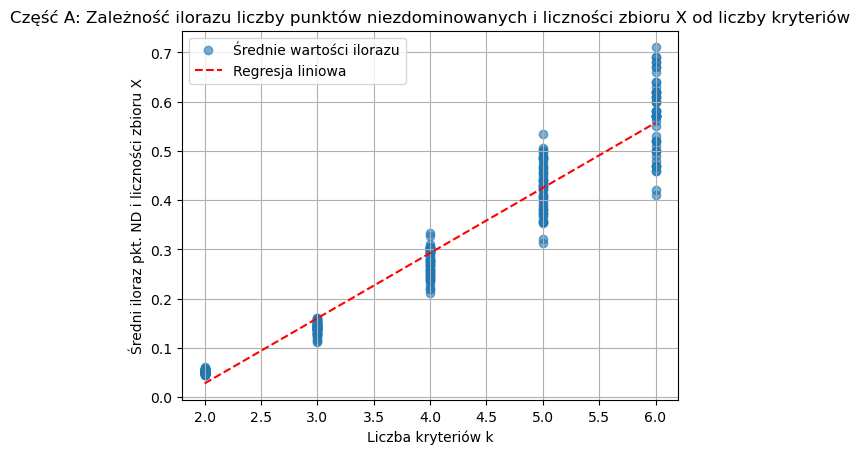

In [69]:
dfA = analiza_A(k0=6, n_points=100, n_sets=50, funkcja=1)

Część B – regresja liniowa:
y = -0.2178 * (k0 - k) + 0.9317


c:\Users\patry\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


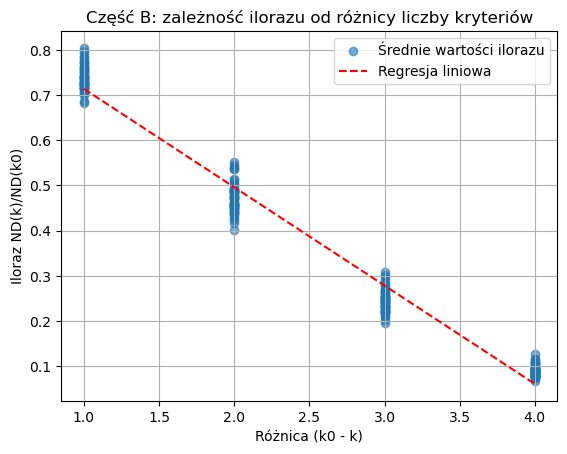

In [70]:
dfB = analiza_B(k0=6, n_points=100, n_sets=50, funkcja=1)